## Resume Analysis using spaCy

In [ ]:
!pip install jsonlines

In [ ]:
#spacy
import spacy
from spacy.pipeline import EntityRuler
from spacy.lang.en import English
from spacy.tokens import Doc

#Visualization
from spacy import displacy
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

#Data loading/ Data manipulation
import pandas as pd
import numpy as np
import jsonlines

#nltk
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download(['stopwords','wordnet'])

#warning
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
df=pd.read_csv(r'Resume.csv')
df.head()

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


In [ ]:
## loading spacy model

nlp = spacy.load("en_core_web_sm")
skill_pattern_path = "jz_skill_patterns.jsonl"    ## from jobzilla skill jsonl file

In [ ]:
print(skill_pattern_path)

jz_skill_patterns.jsonl


In [ ]:
## Entity Ruler

ruler = nlp.add_pipe("entity_ruler")
ruler.from_disk(skill_pattern_path)
nlp.pipe_names

['tok2vec',
 'tagger',
 'parser',
 'attribute_ruler',
 'lemmatizer',
 'ner',
 'entity_ruler']

In [ ]:
## Skills

def get_skills(text):     ##is going to extract skills from a single text.
    doc = nlp(text)
    myset = []
    subset = []
    for ent in doc.ents:
        if ent.label_ == "SKILL":
            subset.append(ent.text)
    myset.append(subset)
    return subset


def unique_skills(x):     ## will remove duplicates.
    return list(set(x))

In [ ]:
## Cleaning resume text  using nltk and regex

clean = []
for i in range(df.shape[0]):
    review = re.sub(
        '(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?"',
        " ",
        df["Resume_str"].iloc[i],
    )
    review = review.lower()
    review = review.split()
    lm = WordNetLemmatizer()
    review = [
        lm.lemmatize(word)
        for word in review
        if not word in set(stopwords.words("english"))
    ]
    review = " ".join(review)
    clean.append(review)


In [ ]:
## Applying functions

df["Clean_Resume"] = clean
df["skills"] = df["Clean_Resume"].str.lower().apply(get_skills)
df["skills"] = df["skills"].apply(unique_skills)
df.head()

,ID,Resume_str,Resume_html,Category,Clean_Resume,skills
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR,hr administrator marketing associate hr admini...,[]
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR,hr specialist u hr operation summary versatile...,[]
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR,hr director summary 20 year experience recruit...,[]
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR,hr specialist summary dedicated driven dynamic...,[]
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR,hr manager skill highlight hr skill hr departm...,[]


In [ ]:
df.columns

Index(['ID', 'Resume_str', 'Resume_html', 'Category', 'Clean_Resume',
       'skills'],
      dtype='object')

<Axes: xlabel='count', ylabel='Category'>

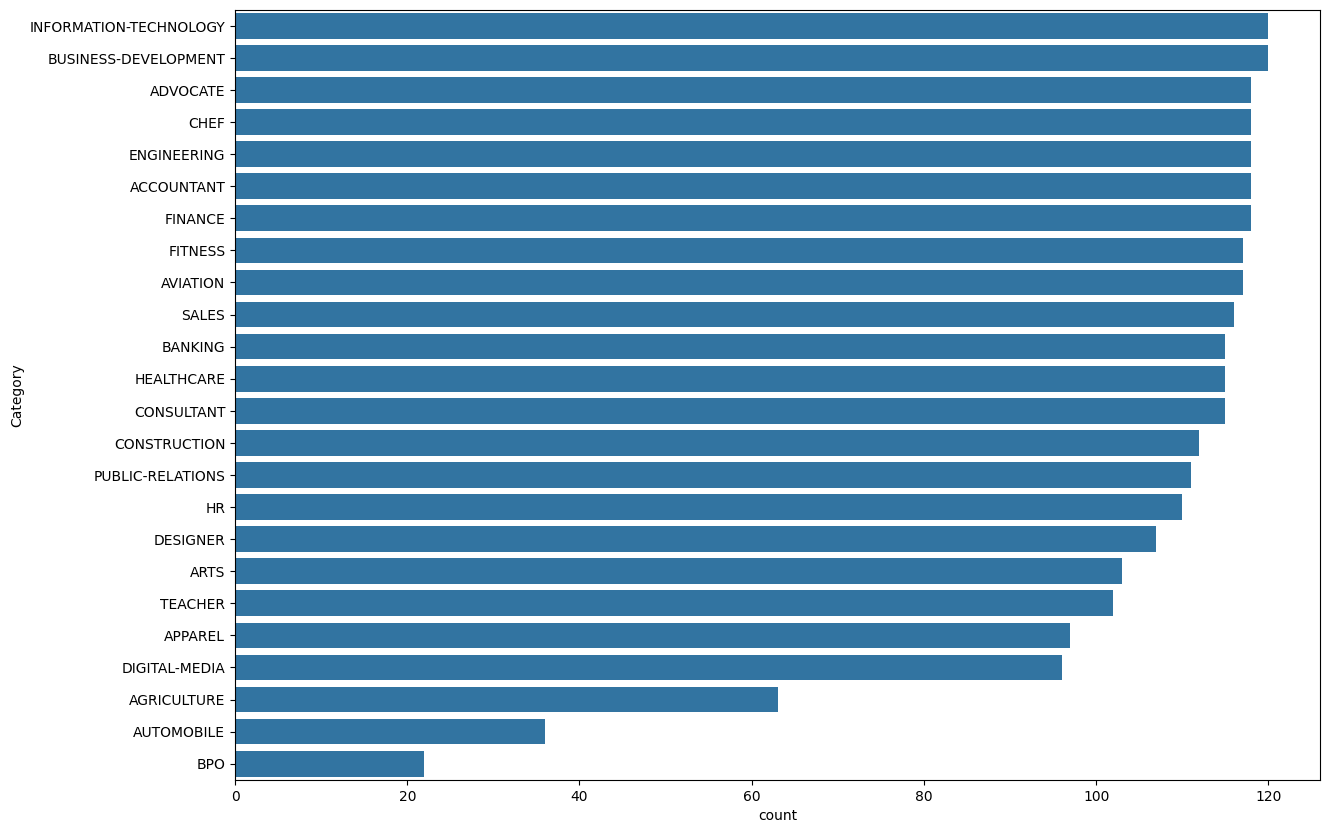

In [ ]:
plt.figure(figsize=(14,10))
sns.countplot(y='Category',
              data=df,
             order = df['Category'].value_counts().index)

#Business Development and Information Technology are the top categories.

In [ ]:
Job_cat = df["Category"].unique()
Job_cat = np.append(Job_cat,'ALL')

In [ ]:
Job_cat

array(['HR', 'DESIGNER', 'INFORMATION-TECHNOLOGY', 'TEACHER', 'ADVOCATE',
       'BUSINESS-DEVELOPMENT', 'HEALTHCARE', 'FITNESS', 'AGRICULTURE',
       'BPO', 'SALES', 'CONSULTANT', 'DIGITAL-MEDIA', 'AUTOMOBILE',
       'CHEF', 'FINANCE', 'APPAREL', 'ENGINEERING', 'ACCOUNTANT',
       'CONSTRUCTION', 'PUBLIC-RELATIONS', 'BANKING', 'ARTS', 'AVIATION',
       'ALL'], dtype=object)

Text(0.5, 1.0, "Most Used Words in ['HR' 'DESIGNER' 'INFORMATION-TECHNOLOGY' 'TEACHER' 'ADVOCATE'\n 'BUSINESS-DEVELOPMENT' 'HEALTHCARE' 'FITNESS' 'AGRICULTURE' 'BPO' 'SALES'\n 'CONSULTANT' 'DIGITAL-MEDIA' 'AUTOMOBILE' 'CHEF' 'FINANCE' 'APPAREL'\n 'ENGINEERING' 'ACCOUNTANT' 'CONSTRUCTION' 'PUBLIC-RELATIONS' 'BANKING'\n 'ARTS' 'AVIATION' 'ALL'] Resume")

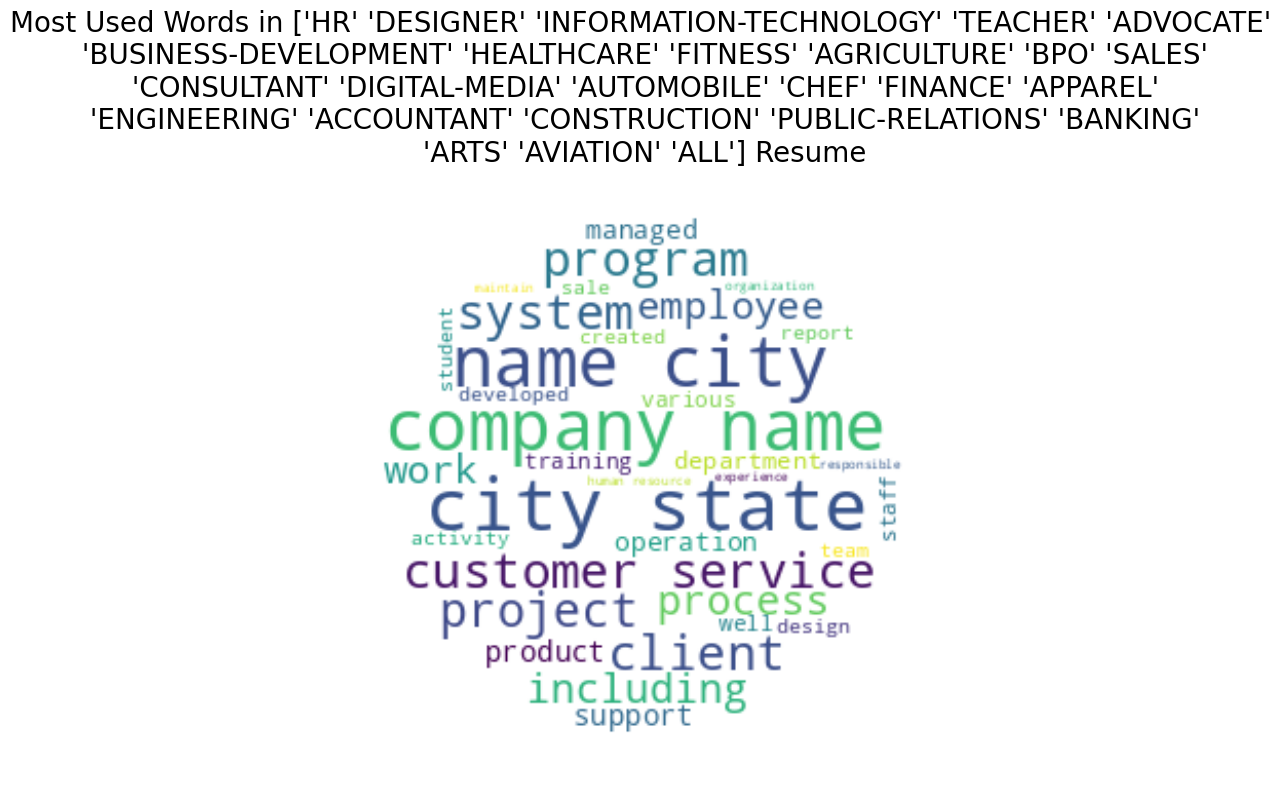

In [ ]:
## Showing Most used words in Clean Resumes uisng WordCloud

text = ""
for i in df["Clean_Resume"].values:
    text += i + " "

plt.figure(figsize=(8, 8))

x, y = np.ogrid[:300, :300]

mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wc = WordCloud(
    width=800,
    height=800,
    background_color="white",
    min_font_size=6,
    repeat=True,
    mask=mask,
)
wc.generate(text)

plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.title(f"Most Used Words in {Job_cat} Resume", fontsize=20)

In [ ]:
## entity Recognizer

sent = nlp(df["Resume_str"].iloc[15])
displacy.render(sent, style="ent", jupyter=True)

In [ ]:
# Dependency Parsing
displacy.render(sent[0:10], style="dep", jupyter=True, options={"distance": 90})


In [ ]:
patterns = df.Category.unique()
for a in patterns:
    ruler.add_patterns([{"label": "Job-cat", "pattern": a}])

In [ ]:
# testing on first resume from the dataset
# options=[{"ents": "Job-Category", "colors": "#ff3232"},{"ents": "SKILL", "colors": "#56c426"}]
colors = {
    "Job-cat": "linear-gradient(90deg, #aa9cfc, #fc9ce7)",
    "SKILL": "linear-gradient(90deg, #9BE15D, #00E3AE)",
    "ORG": "#ffd966",
    "PERSON": "#e06666",
    "GPE": "#9fc5e8",
    "DATE": "#c27ba0",
    "ORDINAL": "#674ea7",
    "PRODUCT": "#f9cb9c",
}
options = {
    "ents": [
        "Job-cat",
        "SKILL",
        "ORG",
        "PERSON",
        "GPE",
        "DATE",
        "ORDINAL",
        "PRODUCT",
    ],
    "colors": colors,
}
sent = nlp(df["Resume_str"].iloc[0])
displacy.render(sent, style="ent", jupyter=True, options=options)

In [ ]:
## adding some extra patterns
patterns = [
    {"label": "ORG", "pattern": "Maulana Abul Kalam Azad University Of Technology"},
    {"label": "GPE", "pattern": "Kulgachia, Howrah  West Bengal"},
    {"label": "PERSON", "pattern": "Bidisha Adhikari"},
    {"label": "ORG", "pattern": "MAKAUT"},
    {"label":"SKILL", "pattern":"Machine Learning"},
    {"label": "ORG", "pattern": "EdX"},
    {"label": "ORG", "pattern": "WBCHSE"},
    {"label": "ORG", "pattern": "Bagnan Adarsha Balika Vidyalaya"},
    {"label": "PHONE NUMBER", "pattern": "+919874051938"},
    {"label": "EMAIL", "pattern": "bidishaadhikari2015@gmail.com"},
    {"label": "PORTFOLIO", "pattern": "linkedin.com/in/bidisha-adhikari-53273621a"}

     ]

ruler.add_patterns(patterns)

In [ ]:

colors = {
    "Job-cat": "linear-gradient(90deg, #aa9cfc, #fc9ce7)",
    "SKILL": "linear-gradient(90deg, #9BE15D, #00E3AE)",
    "ORG": "#ffd966",
    "PERSON": "#e06666",
    "GPE": "#9fc5e8",
    "DATE": "#c27ba0",
    "PHONE NUMBER": "#674ea7",
    "EMAIL": "#f9cb9c",
    "PORTFOLIO":"#BFD374"
}
options = {
    "ents": [
        "Job-cat",
        "SKILL",
        "ORG",
        "PERSON",
        "GPE",
        "DATE",
        "PHONE NUMBER",
        "EMAIL",
        "PORTFOLIO"
    ],
    "colors": colors,
}
sent = nlp(df["Resume_str"].iloc[10])
displacy.render(sent, style="ent", jupyter=True, options=options)

#Testing on my resume

In [ ]:
!pip install fitz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 38.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.4/95.4 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 421.5/421.5 kB 28.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 528.1/528.1 kB 27.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 62.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 2.5 MB/s eta 0:00:00


In [ ]:
!pip install tools

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.4/101.4 kB 3.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for tools: filename=tools-0.1.9-py3-none-any.whl size=46730 sha256=c74f4ed3580e9fc60bb567627e460755207c5775d91f7c5bf6128b0bbeee9966
  Stored in directory: /root/.cache/pip/wheels/bc/d8/9d/52ad6058db295741fe0b776c0fcfdb6670036acab59ce4ccfd
  Created wheel for pytils: filename=pytils-0.4.3-py3-none-any.whl size=32806 sha256=c7058095fc63065970b614b7ff80401d1d49588d5d82b579a6d9403c19340ab4
  Stored in directory: /root/.cache/pip/wheels/3e/a7/be/135c0d4eaa74b54f43b5b0e0b30284b1c2081fe0581424408a
Successfully built tools pytils


In [ ]:
print(fitz.__version__)

0.0.1dev2


In [ ]:
pip install --upgrade pymupdf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 61.7 MB/s eta 0:00:00


In [ ]:
# Testing on a resume
# converting PDF to text
import sys, fitz,pymupdf
fname=r'main resume.pdf'
doc=pymupdf.open(fname)
text=""
for page in doc:
    text = text + str(page.get_text())
tx = " ".join(text.split('\n'))
print(tx)

Sanskar Kesari sanskar4368@gmail.com   |    6390697775     |     Chennai, Tamil Nadu  |     linkedin.com/in/sanskar-kesari Summary As a proficient Data Scientist with extensive experience in machine learning algorithms, I have a strong background in  natural language processing and data analysis, enabling me to extract actionable insights from complex datasets. My  complementary skills in web development allow me to integrate analytical solutions with user-friendly interfaces,  enhancing data accessibility and usability. With excellent corporate communication and leadership abilities, I have  successfully led cross-functional teams and delivered impact-full presentations to stakeholders. Education SRM Institute of Science and Technology Aug 2022 - Present Computer Science   ·  Information Technology  ·  Chennai 9.33 Navrachana School Jun 2020 - Jun 2021 12th   ·  CBSE  ·  Vadodara 84% Delhi Public School  May 2018 - May 2019 10th  ·  CBSE  ·  Prayagraj 92% Relevant Skills Python, C++, 

In [ ]:
### Using my resume
## import sys, fitz

input_resume=tx
sent2 = nlp(input_resume)
displacy.render(sent2, style="ent", jupyter=True, options=options)

In [ ]:
doc = nlp(tx)
for ent in doc.ents:
    print(f'{ent.label_.upper():{30}}- {ent.text}')

PERSON                        - Sanskar Kesari
DATE                          - 6390697775
PERSON                        - Tamil Nadu
ORG                           - Data Scientist
SKILL                         - machine learning
SKILL                         - algorithms
SKILL                         - natural language processing
SKILL                         - data analysis
ORG                           - Education SRM Institute of Science and Technology Aug
MONEY                         - 2022 - Present
SKILL                         - Computer Science
ORG                           - Information Technology
ORG                           - Chennai
CARDINAL                      - 9.33
DATE                          - 2021 12th
ORG                           - CBSE
PERCENT                       - 84%
ORG                           - Delhi Public School
DATE                          - May 2018 - May 2019 10th
ORG                           - CBSE
ORG                           - Prayagraj
PERCE

# Skill matcher

In [ ]:
#setting some required skills
input_skills="Data Science,Data Analysis,Database,SQL,Machine Learning,tableau,C++"      ## string input
input_skills

'Data Science,Data Analysis,Database,SQL,Machine Learning,tableau,C++'

In [ ]:
# Matching with my resume
req_skills = input_skills.lower().split(",")
resume_skills = unique_skills(get_skills(input_resume.lower()))
score = 0
for x in req_skills:
    if x in resume_skills:
        score += 1
req_skills_len = len(req_skills)
match = round(score / req_skills_len * 100, 1)

print(f"The current Resume is {match}% matched to your requirements")

The current Resume is 42.9% matched to your requirements


In [ ]:
# printing my skills
print(resume_skills)

['authentication', 'visualization', 'natural language processing', 'algorithms', 'firebase', 'business', 'machine learning', 'flask', 'github', 'mysql', 'certificate', 'python', 'cloud storage', 'data science', 'exploratory data analysis', 'data analysis', 'computer science', 'sqlite', 'data visualization']
